In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/stock_valuation.csv',encoding='cp949')
df.head()

,id,name,eps,bps,per,pbr
0,130960,CJ E&M,6301.333333,54068,15.695091,1.829178
1,136480,하림,274.166667,3551,11.489362,0.887074
2,138040,메리츠금융지주,2122.333333,14894,6.313806,0.899691
3,139480,이마트,18268.166670,295780,13.931338,0.860437
4,145990,삼양사,5741.000000,108090,14.283226,0.758627


In [3]:
dff = df.iloc[:,4]
dff = pd.DataFrame(dff)
dff.columns=['per']
dff

,per
0,15.695091
1,11.489362
2,6.313806
3,13.931338
4,14.283226
5,7.453306
6,30.755864
7,25.185866
8,40.802348
9,89.790059


In [4]:
m = np.array(dff['per'])

In [5]:
freq, _ = np.histogram(m, bins=10, range=(0,100))
freq

array([2, 4, 1, 1, 1, 0, 0, 0, 1, 0], dtype=int64)

In [6]:
freq_class = [f'{i}~{(i+10)}' for i in range(0,100,10)]
freq_dist_df = pd.DataFrame({'frequency':freq}, index=pd.Index(freq_class, name='class'))
freq_dist_df

,frequency
class,
0~10,2
10~20,4
20~30,1
30~40,1
40~50,1
50~60,0
60~70,0
70~80,0
80~90,1


In [7]:
class_value = [(i+((i+1)))//2 for i in range(0,100,10)]
class_value

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

In [8]:
rel_freq = freq / freq.sum()
rel_freq#상대도수

array([0.2, 0.4, 0.1, 0.1, 0.1, 0. , 0. , 0. , 0.1, 0. ])

In [9]:
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq#누적상대도수

array([0.2, 0.6, 0.7, 0.8, 0.9, 0.9, 0.9, 0.9, 1. , 1. ])

In [10]:
freq_dist_df['class value']=class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df = freq_dist_df[['class value','frequency','relative frequency','cumulative relative frequency']]
freq_dist_df

,class value,frequency,relative frequency,cumulative relative frequency
class,,,,
0~10,0,2,0.2,0.2
10~20,10,4,0.4,0.6
20~30,20,1,0.1,0.7
30~40,30,1,0.1,0.8
40~50,40,1,0.1,0.9
50~60,50,0,0.0,0.9
60~70,60,0,0.0,0.9
70~80,70,0,0.0,0.9
80~90,80,1,0.1,1.0


In [11]:
#최빈값
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(), 'class value']

10

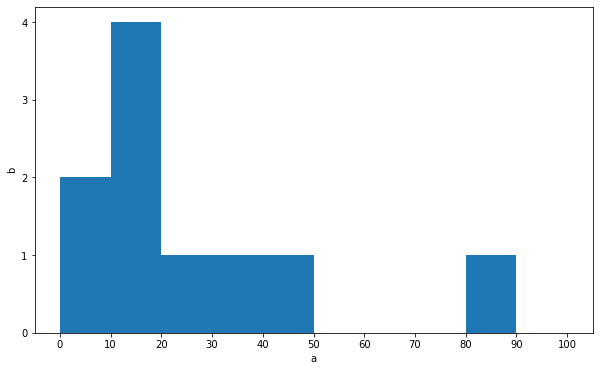

In [12]:
fig = plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)
freq, _, _ = ax.hist(m, bins=10, range=(0,100))
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_xticks(np.linspace(0,100,10+1))
ax.set_yticks(np.arange(0,freq.max()+1))
plt.show()

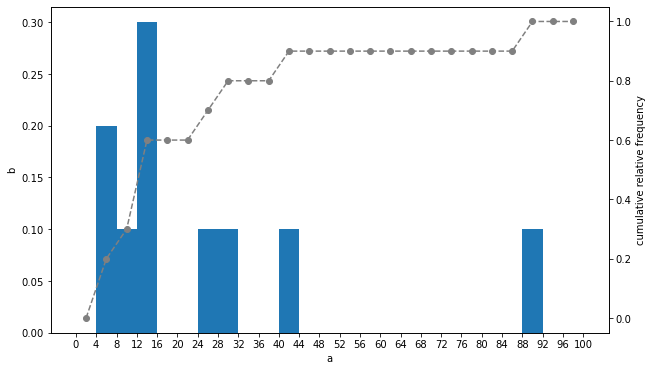

In [13]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111) # 1by1지정 하나의 영역에 그림
ax2 = ax1.twinx() # y축 스케일이 다른 그래프를 ax1과 동일한 영역에 생성
weights = np.ones_like(m) / len(m)
rel_freq, _, _ =ax1.hist(m, bins=25, range=(0,100), weights=weights)
cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0, 100, 4)]
ax2.plot(class_value, cum_rel_freq, ls='--', marker='o',color='gray')
ax2.grid(visible=False)# 눈금제거

ax1.set_xlabel('a')
ax1.set_ylabel('b')
ax2.set_ylabel('cumulative relative frequency')
ax1.set_xticks(np.linspace(0,100,25+1))

plt.show()